## Exploratiry Data Analysis of Dataset

- Agile
- Create class to share functions
- topics: market basket, customer segmentation, trend prediction

## 1. Dataset import and pre-processing

In [3]:
orders = pd.read_csv('order_dataset.csv')

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,29,30,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
orders.shape

(85925, 42)

In [4]:
orders.dtypes

Name                            object
Financial Status                object
Paid at                         object
Fulfillment Status              object
Accepts Marketing               object
Currency                        object
Subtotal                       float64
Shipping                       float64
Taxes                          float64
Total                          float64
Discount Code                   object
Discount Amount                float64
Shipping Method                 object
Created at                      object
Lineitem quantity                int64
Lineitem name                   object
Lineitem price                 float64
Lineitem compare at price      float64
Lineitem sku                    object
Lineitem fulfillment status     object
Shipping Street                 object
Shipping Address1               object
Shipping Address2               object
Shipping Company                object
Shipping City                   object
Shipping Zip             

In [20]:
pd.set_option('display.max_columns', orders.shape[1])
orders.head(5)

,financial_status,paid_at,fulfillment_status,accepts_marketing,subtotal,shipping,taxes,total,discount_code,discount_amount,shipping_method,created_at,lineitem_quantity,lineitem_name,lineitem_price,lineitem_compare_at_price,lineitem_sku,lineitem_fulfillment_status,shipping_address2,shipping_company,shipping_city,shipping_zip,shipping_province,shipping_country,cancelled_at,payment_method,refunded_amount,vendor,tags,risk_level,tax_1_name,tax_1_value,tax_2_name,tax_2_value,order_id,category,material,color,shape,created.month,created.day,created.year,discount_code2,discount_perc,shipping_method2,shipping_continent,payment_method2,customer_id
0,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.50,3.50,16646.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,us jewelry house,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
1,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.25,3.25,16649.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,us jewelry house,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
2,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,tri tone cubic zirconia paved simple band ring...,10.50,10.50,27281.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,impression,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,zirconia,other,cubic,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
3,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,geometric tortoise link long necklace - brown,9.75,9.75,27976.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,ella,NaN,low,NaN,NaN,NaN,NaN,#4746,necklace,other,brown,geometric,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
4,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,acetate skinny bangle bracelet with front clos...,5.25,5.25,28943.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,stylist,NaN,low,NaN,NaN,NaN,NaN,#4746,bracelet,acetate,white/brown,skinny,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz


In [ ]:
orders.columns

In [84]:
orders['Financial Status'].unique() #
orders['Fulfillment Status'].unique() # 3 values plus nan, not sure what partial means, 
orders['Accepts Marketing'].unique() # yes, no, nan
orders['Currency'].unique() # no other than USD, can be dropped
orders['Discount Code'].unique() # requires converting if necessary 
orders['Shipping Method'].unique() #merging and converting to less categories
orders['Lineitem sku'].unique() #prodcut number
orders['Lineitem fulfillment status'].unique() # correlates with Fulfillment Status
orders['Shipping Company'].unique() #convert lower case
orders['Shipping City'].unique() #convert lower case
orders['Shipping Country'].unique() #US and Europe
orders['Notes'].unique() #keep as separate columns maybe
orders['Note Attributes'].unique() #drop
orders['Payment Method'].unique() #modify categories
orders['Vendor'].unique() #convert lower case
orders['Tags'].unique() #no idea what to do with it
orders['Risk Level'].unique() 
orders['Source'].unique() # not clear what it all means
# drop Tax Name 3

array(['web', nan, 'shopify_draft_order', 'Edit Order', '412739'],
      dtype=object)

1.1 **create better categories for columns**

In [5]:
orders['Discount Code'].unique() # requires converting if necessary

array([nan, '5OFF500', '10OFF1000', 'CUSTOM DISCOUNT 15%',
       'Custom Discount 10%', 'MOM10', 'MOM5', 'PROM', 'EASTER',
       'FLASH10', 'VDAY5', 'VDAY10', 'WINTER20', 'custom discount',
       'XMAS', 'CYBER10', 'THANKYOU', '10% Off + Security deposit',
       'FALL20', '10HAT', 'HAT10', 'IM9Q4WYNMRZM', '5GABB6JYKLST',
       'PDNGGSNYA0EY', '10OFF500', '15OFF1000', 'EFILVJ9ULWZL',
       '8Y2R7X2QDDDX', 'F1KABY6H1BLC', 'C17A2593XYX6', 'Add10', 'ADD10',
       'add10', 'SUMMER10', 'FUNBAG', 'Cyber20', 'Thankyou15',
       'THANKYOU15', 'thankyou15'], dtype=object)

In [11]:
orders['discount_code'] = orders['Discount Code'].astype(str).map(lambda x: x.lower())

orders['discount_code'].replace(inplace=True, regex=True, to_replace='(5off500|10off1000)', value='1%')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='(10off500)', value='2%')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='(15off1000)', value='1.5%')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(10%|add)(.*)', value='10%')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^.{12,}', value='other')
orders['discount_perc'] = orders.discount_code.str.extract('(\d+)', expand = True)
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(custom).(.*)', value='custom')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(mom)(.*)', value='mom')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(vday)(.*)', value='vday')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(winter)(.*)', value='winter')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(thankyou)(.*)', value='thankyou')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(fall)(.*)', value='fall')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(summer)(.*)', value='summer')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(cyber)(.*)', value='cyber')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='(.*)(hat)(.*)', value='hat')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='^(flash)(.*)', value='flash')

orders['discount_code'].replace(inplace = True, regex=True, to_replace='(summer|winter|fall)', value='seasonal')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='(xmas|easter|vday)', value='holiday')
orders['discount_code'].replace(inplace=True, regex=True, to_replace='(hat|prom|flash|cyber|funbag)', value='other')

In [12]:
orders['discount_code'].unique()

array(['nan', '1%', 'other', 'mom', 'holiday', 'seasonal', 'thankyou',
       '10%', '2%', '1.5%'], dtype=object)

In [13]:
orders.groupby('discount_code')['Name'].count().sort_values(ascending=False)
# combine winter, summer, fall to seasonal
# combine xmas, easter, vday to holiday
# combine other, hat, prom, flash, cyber, funbag to other


discount_code
nan         85518
1%            217
2%             64
holiday        41
other          27
mom            24
thankyou       20
seasonal        5
10%             5
1.5%            4
Name: Name, dtype: int64

In [46]:
orders['shipping_method'] = orders['Shipping Method'].astype(str).map(lambda x: x.lower())

In [51]:
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(.*)(fedex)(.*)(ground)(.*)', value='fedex_ground')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(free shipping|standard shipping)', value='fedex_ground')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(.*)(fedex)(.*)(overnight)(.*)', value='fedex_overnight')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(.*)(#)(.*)', value='nan')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(fedex 2 day)', value='fedex_2day')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(fedex express saver)', value='fedex_express')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(.*)(\d+)$', value='nan')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(ups)(.*)', value='ups')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(.*)(international)(.*)', value='fedex_international')
orders['shipping_method'].replace(inplace=True, regex=True, to_replace='(drop off at manhattan silver|store pickup)', value='nan')

In [52]:
orders.groupby(['shipping_method'])['Name'].count()

shipping_method
fedex_2day                51
fedex_express             12
fedex_ground            3519
fedex_international       71
fedex_overnight           28
nan                    82213
ups                       31
Name: Name, dtype: int64

In [60]:
orders['shipping_continent'] = orders['Shipping Country']

orders['shipping_continent'].replace(inplace=True, regex=True, to_replace='(DE|FR|GB|GP|NL)', value='europe')
orders['shipping_continent'].replace(inplace=True, regex=True, to_replace='CA', value='canada')
orders['shipping_continent'].replace(inplace=True, regex=True, to_replace='(BB|BM|DO)', value='US')
orders['shipping_continent'].replace(inplace=True, regex=True, to_replace='(AU|CK|NZ)', value='oceania')
orders['shipping_continent'].replace(inplace=True, regex=True, to_replace='(CL|CR|MX|TT|UY)', value='americas')

In [61]:
orders.groupby(['shipping_continent'])['Name'].count()

shipping_continent
US          3642
americas      18
canada        50
europe        14
oceania       15
Name: Name, dtype: int64

In [64]:
orders['payment_method2'] = orders['Payment Method']

orders['payment_method2'].replace(inplace=True, regex=True, to_replace='(.*)(PayPal Express Checkout)(.*)', value='PayPal Express Checkout')
orders['payment_method2'].replace(inplace=True, regex=True, to_replace='(Gift Card)(.*)', value='Gift Card')
orders['payment_method2'].replace(inplace=True, regex=True, to_replace='(.*)(PayPal Express Checkout)(.*)', value='PayPal Express Checkout')

In [66]:
orders.groupby(['payment_method2'])['Name'].count()

payment_method2
Cash on Delivery (COD)      111
Gift Card                     2
PayPal Express Checkout     694
Shopify Payments           2938
manual                        1
Name: Name, dtype: int64

In [ ]:
orders.isnull().sum()

In [ ]:
orders.dtypes

1.2** create customer ID with company name and zip code**

In [ ]:
test = orders.iloc[[0]]

In [ ]:
test['Customer.Id'] = test[['Shipping Zip','Shipping Company']].apply(lambda x: "*".join(x), axis=1)

In [ ]:
test

In [17]:
orders_clean.head(2)

,financial_status,paid_at,fulfillment_status,accepts_marketing,subtotal,shipping,taxes,total,discount_code,discount_amount,shipping_method,created_at,lineitem_quantity,lineitem_name,lineitem_price,lineitem_compare_at_price,lineitem_sku,lineitem_fulfillment_status,shipping_address2,shipping_company,shipping_city,shipping_zip,shipping_province,shipping_country,cancelled_at,payment_method,refunded_amount,vendor,tags,risk_level,tax_1_name,tax_1_value,tax_2_name,tax_2_value,order_id,category,material,color,shape,created.month,created.day,created.year,discount_code2,discount_perc,shipping_method2,shipping_continent,payment_method2,customer_id
0,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.50,3.50,16646.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,us jewelry house,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
1,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.25,3.25,16649.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,us jewelry house,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz


In [28]:
orders_clean['category*color'] = orders_clean[['category','color']].apply(lambda value: '*'.join(value), axis=1)
orders_clean['category*color*shape'] = orders_clean[['category','color','shape']].apply(lambda value: '*'.join(value), axis=1)
orders_clean['category*color*shape*material'] = orders_clean[['category','color','shape','material']].apply(lambda value: '*'.join(value), axis=1)

orders_clean['color*shape'] = orders_clean[['color','shape']].apply(lambda value: '*'.join(value), axis=1)
orders_clean['color*shaper*material'] = orders_clean[['color','shape','material']].apply(lambda value: '*'.join(value), axis=1)

orders_clean['shape*material'] = orders_clean[['shape','material']].apply(lambda value: '*'.join(value), axis=1)

In [29]:
orders_clean.head(5)

,financial_status,paid_at,fulfillment_status,accepts_marketing,subtotal,shipping,taxes,total,discount_code,discount_amount,shipping_method,created_at,lineitem_quantity,lineitem_name,lineitem_price,lineitem_compare_at_price,lineitem_sku,lineitem_fulfillment_status,shipping_address2,shipping_company,shipping_city,shipping_zip,shipping_province,shipping_country,...,tax_1_name,tax_1_value,tax_2_name,tax_2_value,order_id,category,material,color,shape,created.month,created.day,created.year,discount_code2,discount_perc,shipping_method2,shipping_continent,payment_method2,customer_id,category*color,category*color*shape,category*color*shape*material,color*shape,color*shaper*material,shape*material
0,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.50,3.50,16646.0,pending,NaN,t-trendz,brownsville,78520,tx,us,...,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz,ring*turquoise,ring*turquoise*other,ring*turquoise*other*crystal,turquoise*other,turquoise*other*crystal,other*crystal
1,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.25,3.25,16649.0,pending,NaN,t-trendz,brownsville,78520,tx,us,...,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz,ring*turquoise,ring*turquoise*other,ring*turquoise*other*crystal,turquoise*other,turquoise*other*crystal,other*crystal
2,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,tri tone cubic zirconia paved simple band ring...,10.50,10.50,27281.0,pending,NaN,t-trendz,brownsville,78520,tx,us,...,NaN,NaN,NaN,NaN,#4746,ring,zirconia,other,cubic,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz,ring*other,ring*other*cubic,ring*other*cubic*zirconia,other*cubic,other*cubic*zirconia,cubic*zirconia
3,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,geometric tortoise link long necklace - brown,9.75,9.75,27976.0,pending,NaN,t-trendz,brownsville,78520,tx,us,...,NaN,NaN,NaN,NaN,#4746,necklace,other,brown,geometric,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz,necklace*brown,necklace*brown*geometric,necklace*brown*geometric*other,brown*geometric,brown*geometric*other,geometric*other
4,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,acetate skinny bangle bracelet with front clos...,5.25,5.25,28943.0,pending,NaN,t-trendz,brownsville,78520,tx,us,...,NaN,NaN,NaN,NaN,#4746,bracelet,acetate,white/brown,skinny,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz,bracelet*white/brown,bracelet*white/brown*skinny,bracelet*white/brown*skinny*acetate,white/brown*skinny,white/brown*skinny*acetate,skinny*acetate


1.3** Convert dates to datetime objects and extract months, years, and days**

In [ ]:
orders['Order.month'] = orders['Created at'].dt.month
orders['Order.day'] = orders['Created at'].dt.dayofyear
orders['Order.year'] = orders['Created at'].dt.year

In [ ]:
orders['Paid at'] = pd.to_datetime(orders['Paid at'])
orders['Created at'] = pd.to_datetime(orders['Created at'])
orders['Cancelled at'] = pd.to_datetime(orders['Cancelled at'])

## Run cleaning functions

In [4]:
#from preprocessing_functions import *
orders_clean = clean_data(orders)

In [5]:
pd.set_option('display.max_columns', orders_clean.shape[1])
orders_clean.head()

,financial_status,paid_at,fulfillment_status,accepts_marketing,subtotal,shipping,taxes,total,discount_code,discount_amount,shipping_method,created_at,lineitem_quantity,lineitem_name,lineitem_price,lineitem_compare_at_price,lineitem_sku,lineitem_fulfillment_status,shipping_address2,shipping_company,shipping_city,shipping_zip,shipping_province,shipping_country,cancelled_at,payment_method,refunded_amount,vendor,tags,risk_level,tax_1_name,tax_1_value,tax_2_name,tax_2_value,order_id,category,material,color,shape,lineitem_total,category*color,category*color*shape,category*color*shape*material,color*shape,color*shaper*material,shape*material,created.month,created.day,created.year,discount_code2,discount_perc,shipping_method2,shipping_continent,payment_method2,customer_id
0,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.50,3.50,16646.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,us jewelry house,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,3.50,ring*turquoise,ring*turquoise*other,ring*turquoise*other*crystal,turquoise*other,turquoise*other*crystal,other*crystal,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
1,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.25,3.25,16649.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,us jewelry house,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,3.25,ring*turquoise,ring*turquoise*other,ring*turquoise*other*crystal,turquoise*other,turquoise*other*crystal,other*crystal,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
2,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,tri tone cubic zirconia paved simple band ring...,10.50,10.50,27281.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,impression,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,zirconia,other,cubic,10.50,ring*other,ring*other*cubic,ring*other*cubic*zirconia,other*cubic,other*cubic*zirconia,cubic*zirconia,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
3,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,geometric tortoise link long necklace - brown,9.75,9.75,27976.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,ella,NaN,low,NaN,NaN,NaN,NaN,#4746,necklace,other,brown,geometric,9.75,necklace*brown,necklace*brown*geometric,necklace*brown*geometric*other,brown*geometric,brown*geometric*other,geometric*other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
4,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,acetate skinny bangle bracelet with front clos...,5.25,5.25,28943.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,stylist,NaN,low,NaN,NaN,NaN,NaN,#4746,bracelet,acetate,white/brown,skinny,5.25,bracelet*white/brown,bracelet*white/brown*skinny,bracelet*white/brown*skinny*acetate,white/brown*skinny,white/brown*skinny*acetate,skinny*acetate,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz


## 2. Inventory Management

- Is there a seasonal trend? By day? By month?
- Trends in products being bought?

Text(0,0.5,u'quantity')

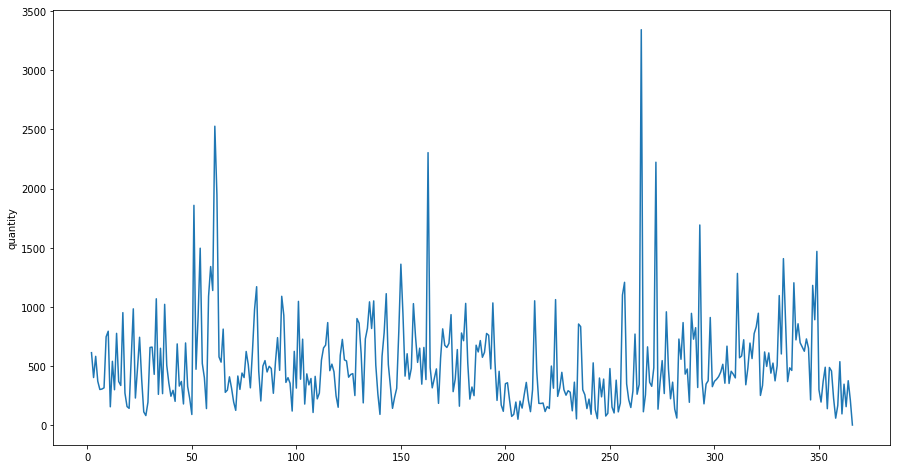

In [6]:
plt.figure(facecolor='white', figsize=(15,8))
g = orders_clean.groupby('created.day')['lineitem_quantity'].sum()
plt.plot(g)
plt.ylabel('quantity')

**We see a three peaks of purchases over the year**

Text(0,0.5,u'quantity')

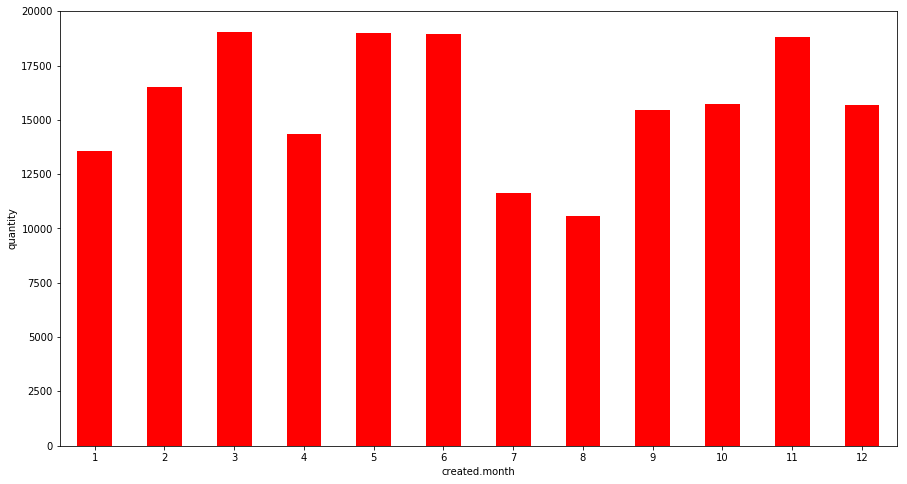

In [7]:
plt.figure(facecolor='white', figsize=(15,8))
orders_clean.groupby('created.month')['lineitem_quantity'].sum().plot(kind='bar', color='red', rot=0)
plt.ylabel('quantity')

## 2. Customer analysis

**The peak months for purchases are early spring, early summer, and right before christmas**

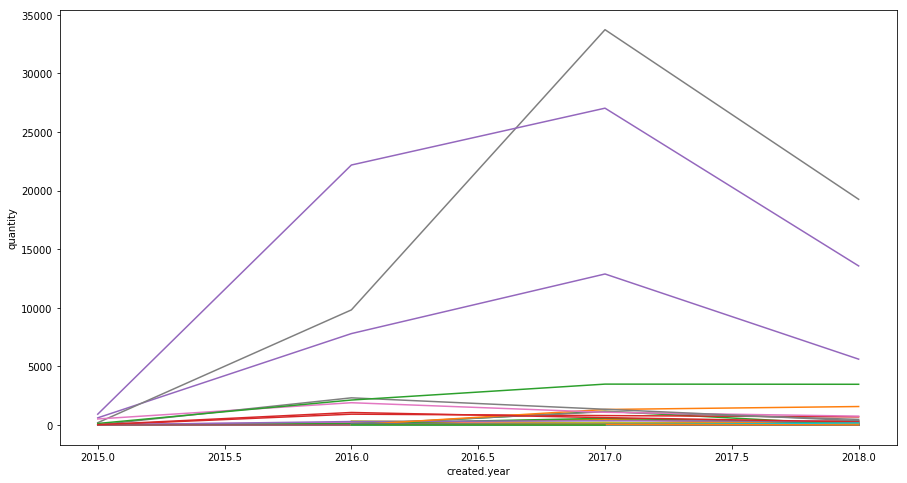

In [15]:
plt.figure(facecolor='white', figsize=(15,8))
for index, group in orders_clean.groupby('category'):
    group_agg = group.groupby(['created.year'])['lineitem_quantity'].sum()
    
    group_agg.plot(y='quantity', label=index, legend=False)
    plt.ylabel('quantity')

**only 5 categories sell well online but los popularity after mid 2017, while others were never popular**

In [16]:
orders_clean.groupby('category')['lineitem_quantity'].sum().sort_values(ascending=False).head()

# necklace, erraings, braceets, and rings are top category

category
necklace    63727
earrings    63020
bracelet    26929
ring         9238
other        4273
Name: lineitem_quantity, dtype: int64

In [20]:
selected_categories = ['necklace', 'earrings', 'ring', 'bracelet']

orders_select = orders_clean.loc[orders_clean['category'].isin(selected_categories)]
orders_select = orders_select.loc[orders_select['created.year'] != 2018]

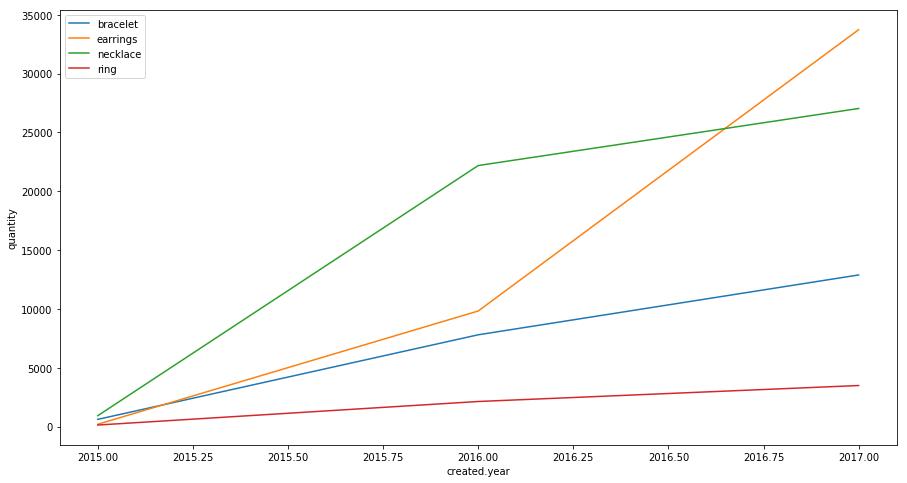

In [24]:
plt.figure(facecolor='white', figsize=(15,8))
for index, group in orders_select.groupby('category'):
    group_agg = group.groupby(['created.year'])['lineitem_quantity'].sum()
    
    group_agg.plot(y='quantity', label=index, legend=True)
    plt.ylabel('quantity')
    
# earrings see the most significant drop

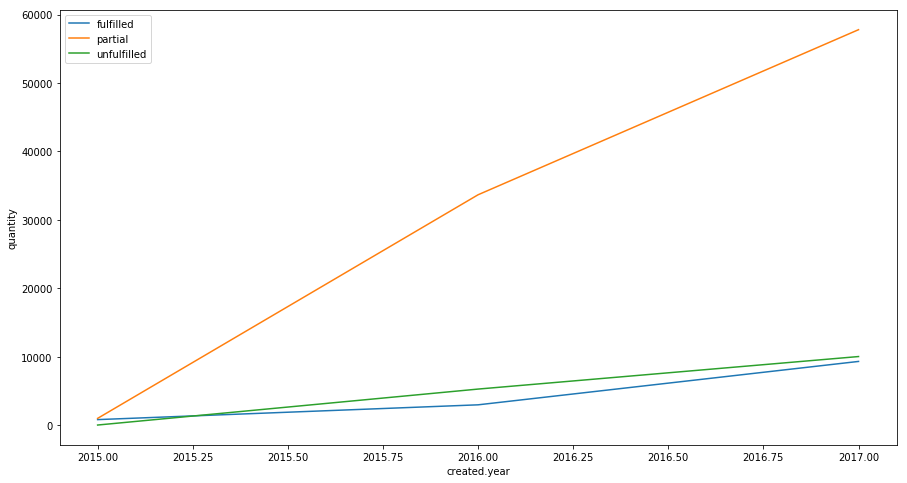

In [26]:
plt.figure(facecolor='white', figsize=(15,8))
for index, group in orders_select.groupby('fulfillment_status'):
    group_agg = group.groupby(['created.year'])['lineitem_quantity'].sum()
    
    group_agg.plot(y='quantity', label=index, legend=True)
    plt.ylabel('quantity')
    
# earrings see the most significant drop

**Number of orders decrease together with number pf partially refundend items, indicating that customers order less**

In [ ]:
plt.figure(facecolor='white', figsize=(15,8))
for index, group in orders_select.groupby('shipping_company'):
    group_agg = group.groupby('created.year')['lineitem_quantity'].sum()
    
    group_agg.plot(y='quantity', label=index, legend=True)
    plt.ylabel('quantity')
    
# earrings see the most significant drop

In [267]:
# top 5 buyers for top 4 categories

for index, group in orders_select.groupby('category'):
    print(index, group.groupby('shipping_company')['lineitem_quantity'].sum().sort_values(ascending=False).head(5))


('bracelet', shipping_company
primp boutique                     1087
kie & kate couture (magic show)     552
coral                               382
city mall david                     340
krush boutique (magic show)         324
Name: lineitem_quantity, dtype: int64)
('earrings', shipping_company
front and company       2153
synergy                 1155
7th street surf shop    1123
violet boutique         1066
primp boutique          1028
Name: lineitem_quantity, dtype: int64)
('necklace', shipping_company
primp boutique           1987
walnut street theatre    1433
a j fine and company      794
7th street surf shop      732
sunsations                727
Name: lineitem_quantity, dtype: int64)
('ring', shipping_company
shelala                  287
primp boutique           267
front and company        218
walnut street theatre    215
mam creaciÓnes ltda      164
Name: lineitem_quantity, dtype: int64)


In [30]:
top_bracelet = ['primp boutique','coral','kie & kate couture (magic show)','city mall david ','krush boutique (magic show)']

top_earrings = ['front and company','synergy','7th street surf shop','violet boutique','primp boutique']

top_necklace = ['primp boutique','walnut street theatre','a j fine and company','7th street surf shop','sunsations']

top_ring = ['primp boutique','front and company','walnut street theatre','shelala','mam creaciÓnes ltda']

In [31]:
top_list = top_bracelet + top_earrings + top_ring
top_list

['primp boutique',
 'coral',
 'kie & kate couture (magic show)',
 'city mall david ',
 'krush boutique (magic show)',
 'front and company',
 'synergy',
 '7th street surf shop',
 'violet boutique',
 'primp boutique',
 'primp boutique',
 'front and company',
 'walnut street theatre',
 'shelala',
 'mam creaci\xc3\x93nes ltda']

In [32]:
orders_tops = orders_select.loc[orders_select['shipping_company'].isin(top_list)]
orders_tops.head()

,financial_status,paid_at,fulfillment_status,accepts_marketing,subtotal,shipping,taxes,total,discount_code,discount_amount,...,shape,created.month,created.day,created.year,discount_code2,discount_perc,shipping_method2,shipping_continent,payment_method2,customer_id
24638,partially_refunded,2017-12-19 15:45:00,partial,yes,348.0,0.0,0.0,348.0,5off500,0.0,...,other,12,353,2017,nan,5,fedex_ground,us,shopify payments,20001*violet boutique
24639,partially_refunded,2017-12-19 15:45:00,partial,yes,348.0,0.0,0.0,348.0,5off500,0.0,...,geometric,12,353,2017,nan,5,fedex_ground,us,shopify payments,20001*violet boutique
24640,partially_refunded,2017-12-19 15:45:00,partial,yes,348.0,0.0,0.0,348.0,5off500,0.0,...,geometric,12,353,2017,nan,5,fedex_ground,us,shopify payments,20001*violet boutique
24641,partially_refunded,2017-12-19 15:45:00,partial,yes,348.0,0.0,0.0,348.0,5off500,0.0,...,geometric,12,353,2017,nan,5,fedex_ground,us,shopify payments,20001*violet boutique
24642,partially_refunded,2017-12-19 15:45:00,partial,yes,348.0,0.0,0.0,348.0,5off500,0.0,...,geometric,12,353,2017,nan,5,fedex_ground,us,shopify payments,20001*violet boutique


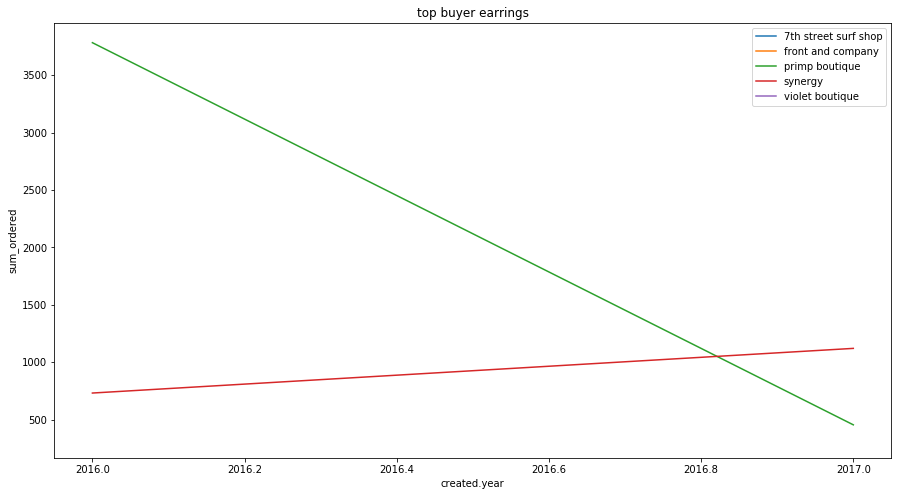

In [34]:
orders_topEar = orders_select.loc[orders_select['shipping_company'].isin(top_earrings)]

plt.figure(facecolor='w', figsize=(15,8))
for index, group in orders_topEar.groupby('shipping_company'):
    grouped = group.groupby(['created.year'])['lineitem_quantity'].sum()
    
    grouped.plot(title='top buyer earrings', label=index, legend=True)
    plt.ylabel('sum_ordered')

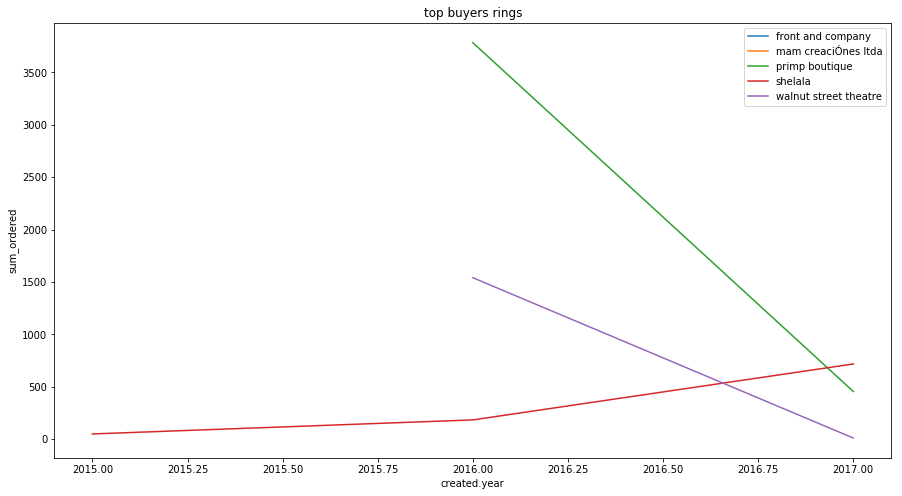

In [42]:
plt.figure(figsize=(15,8), facecolor='w')

orders_topRing = orders_select.loc[orders_select['shipping_company'].isin(top_ring)]

for index, group in orders_topRing.groupby('shipping_company'):
    grouped = group.groupby(['created.year'])['lineitem_quantity'].sum()
    
    grouped.plot(title='top buyers rings', label=index, legend=True)
    plt.ylabel('sum_ordered')

In [386]:
orders_topRing.groupby(['shipping_company','created.year', 'created.month'])['lineitem_quantity'].sum()

shipping_company       created.year  created.month
front and company      2017          5                 455
                                     6                 214
                                     8                 559
                                     9                 179
                                     10                431
                                     12                190
                       2018          2                 267
                                     4                 244
                                     5                 217
mam creaciÓnes ltda    2017          10                824
                       2018          1                 142
                                     2                 399
                                     6                 217
primp boutique         2016          9                3783
                       2017          1                 378
                                     11                 76
     

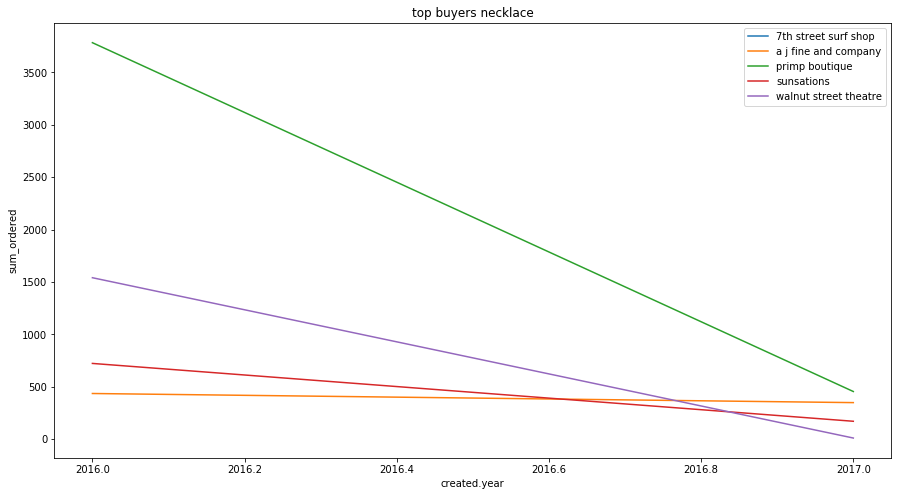

In [40]:
plt.figure(figsize=(15,8), facecolor='w')

orders_topNeck = orders_select.loc[orders_select['shipping_company'].isin(top_necklace)]

for index, group in orders_topNeck.groupby('shipping_company'):
    grouped = group.groupby('created.year')['lineitem_quantity'].sum()
    
    grouped.plot(title='top buyers necklace', label=index, legend=True)
    plt.ylabel('sum_ordered')

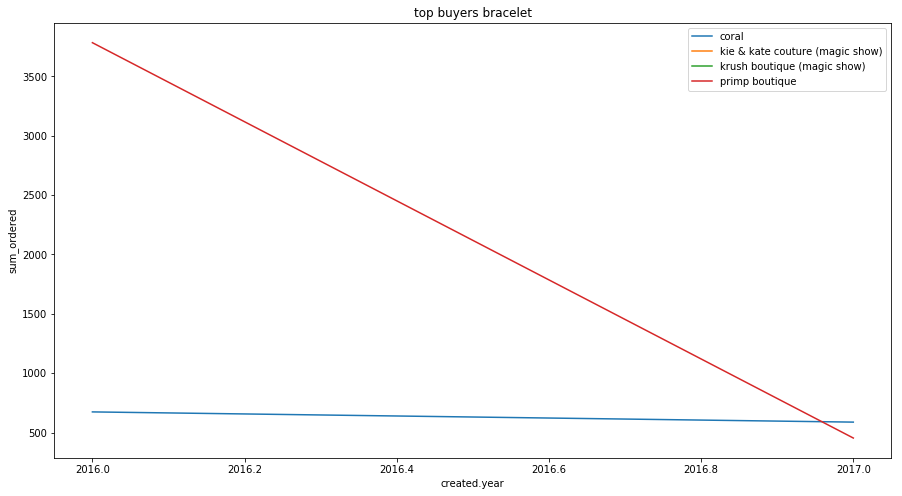

In [41]:
plt.figure(figsize=(15,8), facecolor='w')

orders_topBrace = orders_select.loc[orders_select['shipping_company'].isin(top_bracelet)]

for index, group in orders_topBrace.groupby('shipping_company'):
    grouped = group.groupby('created.year')['lineitem_quantity'].sum()
    
    grouped.plot(title='top buyers bracelet', label=index, legend=True)
    plt.ylabel('sum_ordered')

In [43]:
orders_select.loc[orders_select.shipping_company == 'primp boutique'].groupby(['created.year','lineitem_quantity']).sum()

subtotal  shipping  taxes      total  \
created.year lineitem_quantity                                          
2016         1                   18716.40       0.0    0.0   18716.40   
             2                    9358.20       0.0    0.0    9358.20   
             3                    9358.20       0.0    0.0    9358.20   
             6                   18716.40       0.0    0.0   18716.40   
             9                    9358.20       0.0    0.0    9358.20   
             10                   9358.20       0.0    0.0    9358.20   
             13                   9358.20       0.0    0.0    9358.20   
             19                   9358.20       0.0    0.0    9358.20   
             23                   9358.20       0.0    0.0    9358.20   
             24                  69797.40       0.0    0.0   69797.40   
             27                 651961.20       0.0    0.0  651961.20   
             36                 620474.55       0.0    0.0  620474.55   
2017         5                     372.00       0.0    0.0     372.00   
             9                     372.00       0.0    0.0     372.00   
             10                    372.00       0.0    0.0     372.00   
             16                    372.00       0.0    0.0     372.00   
             18                    744.00       0.0    0.0     744.00   
             27                  14217.56       0.0    0.0   14217.56   

                                discount_amount  lineitem_price  \
created.year lineitem_quantity                                    
2016         1                          2079.60            8.00   
             2                          1039.80            8.75   
             3                          1039.80            3.00   
             6                          2079.60           13.75   
             9                          1039.80            4.00   
             10                         1039.80           12.00   
             13                         1039.80            2.50   
             19                         1039.80            3.50   
             23                         1039.80           12.75   
             24                         2079.60           77.75   
             27                        27034.80          323.00   
             36                        24955.20          327.00   
2017         5                             0.00            3.25   
             9                             0.00           11.25   
             10                            0.00            3.25   
             16                            0.00            6.00   
             18                            0.00            7.00   
             27                         2508.94           44.25   

                                lineitem_compare_at_price  refunded_amount  \
created.year lineitem_quantity                                               
2016         1                                       8.00             0.00   
             2                                       8.75             0.00   
             3                                       3.00             0.00   
             6                                      13.75             0.00   
             9                                       4.00             0.00   
             10                                     14.50             0.00   
             13                                      2.50             0.00   
             19                                      3.50             0.00   
             23                                     15.50             0.00   
             24                                     83.00         16013.36   
             27                                    328.50        128106.88   
             36                                    327.00        124103.54   
2017         5                                       3.25           161.75   
             9                                      11.25    

In [44]:
orders.loc[orders.shipping_company == 'primp boutique'].groupby(['created.year','category','fulfillment_status'])['total'].count()

created.year  category  fulfillment_status
2016          bracelet  partial               19
                        unfulfilled           19
              earrings  partial               11
                        unfulfilled           11
              necklace  partial               33
                        unfulfilled           30
              pin       partial                1
                        unfulfilled            1
              ring      partial                4
                        unfulfilled            3
2017          earrings  fulfilled             14
              necklace  partial                4
              ring      partial                2
2018          earrings  fulfilled              5
              necklace  fulfilled              8
Name: total, dtype: int64

In [10]:
orders_clean.head(5)

,financial_status,paid_at,fulfillment_status,accepts_marketing,subtotal,shipping,taxes,total,discount_code,discount_amount,shipping_method,created_at,lineitem_quantity,lineitem_name,lineitem_price,lineitem_compare_at_price,lineitem_sku,lineitem_fulfillment_status,shipping_address2,shipping_company,shipping_city,shipping_zip,shipping_province,shipping_country,cancelled_at,payment_method,refunded_amount,vendor,tags,risk_level,tax_1_name,tax_1_value,tax_2_name,tax_2_value,order_id,category,material,color,shape,created.month,created.day,created.year,discount_code2,discount_perc,shipping_method2,shipping_continent,payment_method2,customer_id
0,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.50,3.50,16646.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,us jewelry house,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
1,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,turquoise crystal rhinestone ring - gdtq,3.25,3.25,16649.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,us jewelry house,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,crystal,turquoise,other,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
2,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,tri tone cubic zirconia paved simple band ring...,10.50,10.50,27281.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,impression,NaN,low,NaN,NaN,NaN,NaN,#4746,ring,zirconia,other,cubic,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
3,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,geometric tortoise link long necklace - brown,9.75,9.75,27976.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,ella,NaN,low,NaN,NaN,NaN,NaN,#4746,necklace,other,brown,geometric,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz
4,paid,2018-07-16 12:31:00,unfulfilled,yes,100.5,13.64,0.0,114.14,NaN,0.0,fedex ground,2018-07-16 12:31:00,1,acetate skinny bangle bracelet with front clos...,5.25,5.25,28943.0,pending,NaN,t-trendz,brownsville,78520,tx,us,NaT,shopify payments,0.0,stylist,NaN,low,NaN,NaN,NaN,NaN,#4746,bracelet,acetate,white/brown,skinny,7,197,2018,nan,NaN,fedex_ground,us,shopify payments,78520*t-trendz


In [15]:
orders_clean.loc[orders_clean['created.year'] == 2015].groupby('created.month').count()

,financial_status,paid_at,fulfillment_status,accepts_marketing,subtotal,shipping,taxes,total,discount_code,discount_amount,shipping_method,created_at,lineitem_quantity,lineitem_name,lineitem_price,lineitem_compare_at_price,lineitem_sku,lineitem_fulfillment_status,shipping_address2,shipping_company,shipping_city,shipping_zip,shipping_province,shipping_country,cancelled_at,payment_method,refunded_amount,vendor,tags,risk_level,tax_1_name,tax_1_value,tax_2_name,tax_2_value,order_id,category,material,color,shape,created.day,created.year,discount_code2,discount_perc,shipping_method2,shipping_continent,payment_method2,customer_id
created.month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
11,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392
12,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644
